## Sentiment Analysis Of Boris Johnson Must Go
The first phase of this study explore the demographic data set of tweet extract based on **BorisJohnsMustGo** leaving behind the tweet its self which measure the opinoin of users. Hence this, section will statistical explore the tweet extracted on the aforementioned topic, this will be represented in a descriptive manner.

The notebook is break down into following:


- Library to Use
- Read in the Data set
- Drop Some Features
- Clean text/ Preprocessing
- Sentiment Analysis Vader
- Descriptive Analysis and Data Visualization

## Library Used 

In [1]:
#Library to Use 
import pandas as pd 
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
import re 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import nltk
nltk.download('vader_lexicon')
#Advance Data Visualization 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [155]:
from plotly.subplots import make_subplots
plt.rc('figure',figsize=(17,13))

## Read Dataset

The saved data set will from the previous notebook on dempgraphic analysis of the tweet will be read in.

In [105]:
#Read the data set in using pd.csv()
bj = pd.read_csv('BJ_twt4.csv', parse_dates= ['user_date','date'])
#drop the unmamed: 0 columns that represent index apart from the default index cause its not needed
bj.drop('Unnamed: 0', axis = 1, inplace = True)
# The top 5 rows of the data was display to have brief view of the data set at glance 
bj.head ()

,user_name,date,tweet,user_date,favorite_count,user_locatn,sources,followers,ver_acct,retwt_count,...,today,yr_crt,acc_yrold,day_date,hur_date,min_date,tot_eng,acc_cat,city,country
0,Lorn,2021-12-17 09:17:00,RT @daviesaplegend: Well done North Shropshire...,2021-09-28 06:40:00,0,Plague Island,Twitter Web App,276,False,10,...,2021,2021,0,17,9,17,10,casual_acct,Plague Island,Belgium
1,SasasaG35,2021-12-17 09:17:00,Well done Shropshire! 👏👏👏👏👏\n\nHave that #Tory...,2020-06-02 11:35:00,0,"London, England",Twitter for iPhone,1501,False,0,...,2021,2020,1,17,9,17,0,normal_acct,London,England
2,RainbowWarriorJOHNSONOUTGTTOFBPE,2021-12-17 09:16:00,RT @hewitson10: It wasn’t a Downing Street loc...,2015-11-24 11:47:00,0,Alcatraz,Twitter for Android,20874,False,2,...,2021,2015,6,17,9,16,2,semi-influential,Alcatraz,Alcatraz
3,Michel,2021-12-17 09:13:00,@CarolineLucas @MetroUK Ethics and quality of ...,2012-12-29 20:31:00,0,"Gent, België",Twitter for iPhone,86,False,0,...,2021,2012,9,17,9,13,0,casual_acct,Gent,België
4,NeilMullensFBPPRGTTO,2021-12-17 09:12:00,Quality reporting from @GBNEWS as usual.\nActu...,2009-06-26 07:51:00,0,The Far Side of Crazy,Twitter Web App,1570,False,0,...,2021,2009,12,17,9,12,0,normal_acct,The Far Side of Crazy,The Far Side of Crazy


In [4]:
bj.columns

Index(['user_name', 'date', 'tweet', 'user_date', 'favorite_count',
       'user_locatn', 'sources', 'followers', 'ver_acct', 'retwt_count',
       'retwt_status', 'user_fav', 'today', 'yr_crt', 'acc_yrold', 'day_date',
       'hur_date', 'min_date', 'tot_eng', 'acc_cat', 'city', 'country'],
      dtype='object')

## Drop Features 

In this section, features('user_date','retwt_count','retwt_status', 'user_fav', 'today', 'min_date') of less effect are dropped

In [188]:
#Drop the unecessary Colunms that are not part of text sentiment analysis 
bj2 = bj.drop(['user_date', 'retwt_count','user_locatn','retwt_status', 'user_fav', 'today', 'min_date'], axis = 1)
#display the top 5 row of the data set after some minor cleaning
bj2.head ()
#second data set
df2 = df.drop(['user_date', 'retwt_count','user_locatn','retwt_status', 'user_fav', 'today', 'min_date'], axis = 1)
df2.head()

,user_name,date,tweet,favorite_count,sources,followers,ver_acct,yr_crt,acc_yrold,day_date,hur_date,tot_eng,acc_cat
0,Lorn,2021-12-17 09:17:00,RT @daviesaplegend: Well done North Shropshire...,0,Twitter Web App,276,False,2021,0,17,9,10,casual_acct
1,PeterKemp,2021-12-17 09:17:00,"RT @MartynCooper: Well, The @LibDems have done...",0,Twitter Web App,1576,False,2019,2,17,9,3,normal_acct
2,SasasaG35,2021-12-17 09:17:00,Well done Shropshire! 👏👏👏👏👏\n\nHave that #Tory...,0,Twitter for iPhone,1501,False,2020,1,17,9,0,normal_acct
3,RainbowWarriorJOHNSONOUTGTTOFBPE,2021-12-17 09:16:00,RT @hewitson10: It wasn’t a Downing Street loc...,0,Twitter for Android,20874,False,2015,6,17,9,2,semi-influential
4,AndySadler,2021-12-17 09:16:00,Today is a great #FollowBackFriday #NorthShrop...,0,Twitter for iPhone,79,False,2015,6,17,9,0,casual_acct


## Text PreProcessing 

**Text Preprocessing**

Text Preprocessing is traditionally an important step for Natural Language Processing (NLP) tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better. The text preprocessing carried in this note are stated below:

- Removing URL Links starting with "http" or "https" or "www"
- Removing Twitter Handling
- Removing Single word
- lower casing
- Removing of emoji
- Removing the Hastag
- Removing non Alphabet

In [249]:
# Define a Function that will Clean the Tweets 
'''
input: data containing tweet to be cleaned 
output: cleaned text data

'''
def clean_tweet(tweet):
    tweet = str(tweet).lower()
    tweet = re.sub(r'https?:/\/\S+|www\.\S+','', tweet) #remove url
    tweet = re.sub(r'\B#\S+','',tweet)#remove hastags
    tweet = re.sub('@[^\s]+','',tweet)#remove @mentions
    tweet = re.sub(r'\s+[a-zA-Z0-9]\s+','',tweet)# remove single statement
    tweet = re.sub('rt','', tweet)#remove retweets
    tweet = re.sub('\[.*?\]', '', tweet) #remove text in square brackets
    tweet = re.sub('<.*?>+', '', tweet) 
    tweet = re.sub(r"\d+", "", tweet)#remove number 
    tweet = re.sub(r'[^\w\s]','',tweet)#remove punctuation 
    tweet = re.sub(r'\s+', ' ', tweet, flags=re.I) #remove double space 
    return (tweet)

**Note**: 
Here I didn't touch punctuations and case for now as VADER SENTIMENT ANALYSIS SCORES are affected by factors like:  

- Punctuations
- Capitalization
- Preceeding-trigrams 
- Degree modifiers
- Conjunctions etc.

In [228]:
##function for cleaning emojis 
def de_emojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [250]:
#Apply the Function to of text cleaning to tweet by creating a new column for it
bj2['cl_twt'] = bj2['tweet'].apply(lambda x: clean_tweet(x))
#data_set2
df2['cl_twt'] = df2['tweet'].apply(lambda x: clean_tweet(x))

In [251]:
#clean_emoji
bj2['cl_twt'] = bj2['cl_twt'].apply(lambda x: de_emojify(x))
#data_set2
df2['cl_twt'] = df2['cl_twt'].apply(lambda x: de_emojify(x))

In [116]:
bj2.head()

,user_name,date,tweet,favorite_count,sources,followers,ver_acct,yr_crt,acc_yrold,day_date,...,acc_cat,city,country,cl_twt,has,neg_sent,neu_sent,pos_sent,comp_sent,sentiment
0,Lorn,2021-12-17 09:17:00,RT @daviesaplegend: Well done North Shropshire...,0,Twitter Web App,276,False,2021,0,17,...,casual_acct,Plague Island,Belgium,Well done North Shropshire. Bringing down the...,RT @daviesaplegend: Well done North Shropshire...,0.0,0.833,0.167,0.3818,positive
1,SasasaG35,2021-12-17 09:17:00,Well done Shropshire! 👏👏👏👏👏\n\nHave that #Tory...,0,Twitter for iPhone,1501,False,2020,1,17,...,normal_acct,London,England,Well done Shropshire! Have that,BorisJohnsonOut \n\nhttps://t.co/xawqYmGVHr ht...,0.0,0.715,0.285,0.3382,positive
2,RainbowWarriorJOHNSONOUTGTTOFBPE,2021-12-17 09:16:00,RT @hewitson10: It wasn’t a Downing Street loc...,0,Twitter for Android,20874,False,2015,6,17,...,semi-influential,Alcatraz,Alcatraz,It wasntDowning Street lockdown garden party ...,RT @hewitson10: It wasn’t a Downing Street loc...,0.0,0.863,0.137,0.4019,positive
3,Michel,2021-12-17 09:13:00,@CarolineLucas @MetroUK Ethics and quality of ...,0,Twitter for iPhone,86,False,2012,9,17,...,casual_acct,Gent,België,Ethics and quality of leadership ofpolitician...,@CarolineLucas @MetroUK Ethics and quality of ...,0.0,1.000,0.000,0.0000,Neutral
4,NeilMullensFBPPRGTTO,2021-12-17 09:12:00,Quality reporting from @GBNEWS as usual.\nActu...,0,Twitter Web App,1570,False,2009,12,17,...,normal_acct,The Far Side of Crazy,The Far Side of Crazy,"Quality reporting from as usual. Actually, thi...",GTTO… https://t.co/UgutmaWNiK,0.0,1.000,0.000,0.0000,Neutral


In [191]:
#save the cleaned data set 
df2.to_csv('clean_data2.csv')

In [192]:
#Extract The Hastag from the Text 
bj2['has'] = bj2['tweet'].apply(lambda x: x.split('#')[-1])
#Second_dataset 
df2['has'] = df2['tweet'].apply(lambda x: x.split('#')[-1])

## Vader Sentiment Analysis 

**VADER (Valence Aware Dictionary for Entiment Reasoning)** is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion.

It was introduced in 2014, VADER text sentiment analysis uses a human-centric approach, combining qualitative analysis and empirical validation by using human raters and the wisdom of the crowd.

**VADER sentimental analysis** relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up each word's intensity in the text.

In [97]:
#defining a function for getting negative, positive, neutral, and compound score of vader sentiment analysis 
sid = SIA ()
# getting only the negative score
def negative_score(text):
    negative_value = sid.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = sid.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = sid.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = sid.polarity_scores(text)['compound']
    return compound_value

**Note**:

After the text preprocessing of the tweet content of **BorisJohn Dowing Party Scandal**, we further our analysis by using Vader sentiment analysis scores to analyze the opinon of user, categoryzing the Opinon into 'Positive','Negative',and 'Neutral'

In [193]:
#obtaning the four vader score of the tweet  
bj2['neg_sent'] = bj2['cl_twt'].apply(negative_score)# create a new column for negative score
bj2['neu_sent'] = bj2['cl_twt'].apply(neutral_score)# create a new column for neutral score
bj2['pos_sent'] = bj2['cl_twt'].apply(positive_score)# create a new column for positive score
bj2['comp_sent'] =bj2['cl_twt'].apply(compound_score)# create a new column for compound score
#second data
df2['neg_sent'] = df2['cl_twt'].apply(negative_score)# create a new column for negative score
df2['neu_sent'] = df2['cl_twt'].apply(neutral_score)# create a new column for neutral score
df2['pos_sent'] = df2['cl_twt'].apply(positive_score)# create a new column for positive score
df2['comp_sent'] =df2['cl_twt'].apply(compound_score)# create a new column for compound score

In [112]:
#first 5 row of the data set after vader score 
bj2.tail ()

,user_name,date,tweet,favorite_count,sources,followers,ver_acct,yr_crt,acc_yrold,day_date,...,tot_eng,acc_cat,city,country,cl_twt,has,neg_sent,neu_sent,pos_sent,comp_sent
6117,ShanghaiHannah,2021-08-12 16:12:00,Allegra Stratton has quit?\n\n*Insert Alan Par...,0,Twitter for Android,650,False,2009,12,8,...,0,casual_acct,Shanghai,Shanghai,Allegra Stratton has quit? *Insert Alan Partri...,Allegra Stratton has quit?\n\n*Insert Alan Par...,0.000,0.826,0.174,0.5204
6118,𝐃𝐚𝐫𝐬𝐡𝐚𝐧𝐏𝐚𝐭𝐞𝐥,2021-08-12 16:11:00,No! Let the 💩 stay and suffer. We all know he'...,2,Twitter for Android,780,False,2017,4,8,...,2,casual_acct,London,England,No! Let the 💩 stay and suffer. We all know he'...,No! Let the 💩 stay and suffer. We all know he'...,0.424,0.576,0.000,-0.9098
6119,Ronaldsway,2021-08-12 16:11:00,RT @Culturalcapita5: I think Carrie Johnson sh...,0,Twitter for iPhone,374,False,2009,12,8,...,1,casual_acct,Yorkshire,England,think Carrie Johnson should resign.,jen…,0.375,0.625,0.000,-0.3400
6120,GoneRLWalkaboutRLWC2021,2021-08-12 16:11:00,RT @ElRaynerista: Boris Johnson blaming his st...,0,Twitter Web App,1518,False,2019,2,8,...,90,normal_acct,Brighouse Ranger.,Brighouse Ranger.,Boris Johnson blaming his staff for the poiso...,BorisJohnsonO…,0.365,0.529,0.106,-0.7096
6121,Sammi,2021-08-12 16:10:00,Simple and to the point. #BorisJohnsonOut #dow...,0,Twitter for Android,484,False,2009,12,8,...,0,casual_acct,North Wales.,North Wales.,Simple and to the point.,downingstreetparty https://t.co/cEUZ3MaefX,0.000,1.000,0.000,0.0000


In [194]:
#Get the sentiment using the compound score of Vader Sentiment 
bj2['sentiment'] = np.where(bj2['comp_sent'] >0,'positive',np.where(bj2['comp_sent']<0,'negative','Neutral'))
#second data
df2['sentiment'] = np.where(df2['comp_sent'] >0,'positive',np.where(df2['comp_sent']<0,'negative','Neutral'))

In [101]:
#last 5 row after categorizing the sentiment 
bj2.tail()

,user_name,date,tweet,favorite_count,followers,day_date,hur_date,tot_eng,acc_cat,city,country,cl_twt,has,neg_sent,neu_sent,pos_sent,comp_sent,sentiment
6117,ShanghaiHannah,2021-08-12 16:12:00,Allegra Stratton has quit?\n\n*Insert Alan Par...,0,650,8,16,0,casual_acct,Shanghai,Shanghai,Allegra Stratton has quit? *Insert Alan Partri...,Allegra Stratton has quit?\n\n*Insert Alan Par...,0.000,0.826,0.174,0.5204,positive
6118,𝐃𝐚𝐫𝐬𝐡𝐚𝐧𝐏𝐚𝐭𝐞𝐥,2021-08-12 16:11:00,No! Let the 💩 stay and suffer. We all know he'...,2,780,8,16,2,casual_acct,London,England,No! Let the stay and suffer. We all know he's...,No! Let the 💩 stay and suffer. We all know he'...,0.438,0.562,0.000,-0.9098,negative
6119,Ronaldsway,2021-08-12 16:11:00,RT @Culturalcapita5: I think Carrie Johnson sh...,0,374,8,16,1,casual_acct,Yorkshire,England,think Carrie Johnson should resign.,jen…,0.375,0.625,0.000,-0.3400,negative
6120,GoneRLWalkaboutRLWC2021,2021-08-12 16:11:00,RT @ElRaynerista: Boris Johnson blaming his st...,0,1518,8,16,90,normal_acct,Brighouse Ranger.,Brighouse Ranger.,Boris Johnson blaming his staff for the poiso...,BorisJohnsonO…,0.365,0.529,0.106,-0.7096,negative
6121,Sammi,2021-08-12 16:10:00,Simple and to the point. #BorisJohnsonOut #dow...,0,484,8,16,0,casual_acct,North Wales.,North Wales.,Simple and to the point.,downingstreetparty https://t.co/cEUZ3MaefX,0.000,1.000,0.000,0.0000,Neutral


## Descriptive Analysis and Data Visualization 

This section explore the tweet in a descriptive manner, and visualize the data set from every point. This section is divide into segment;

- **Descriptive Analysis**
- **Data Visualization**


## Descriptive Analysis 

Below are the task carried in this section:
- KDF and CDF of Positive, Negative and Neutral Score
- Histogram Distribution for Positive, Negative and Neutral Score
- Average Change in Sentiment(Positive, Negative and Neutral Score) by Time 
- S.D change in Sentiment (Positive, Negative and Neutral Score) by Time 
- Correlation Analysis 


### TASK 1

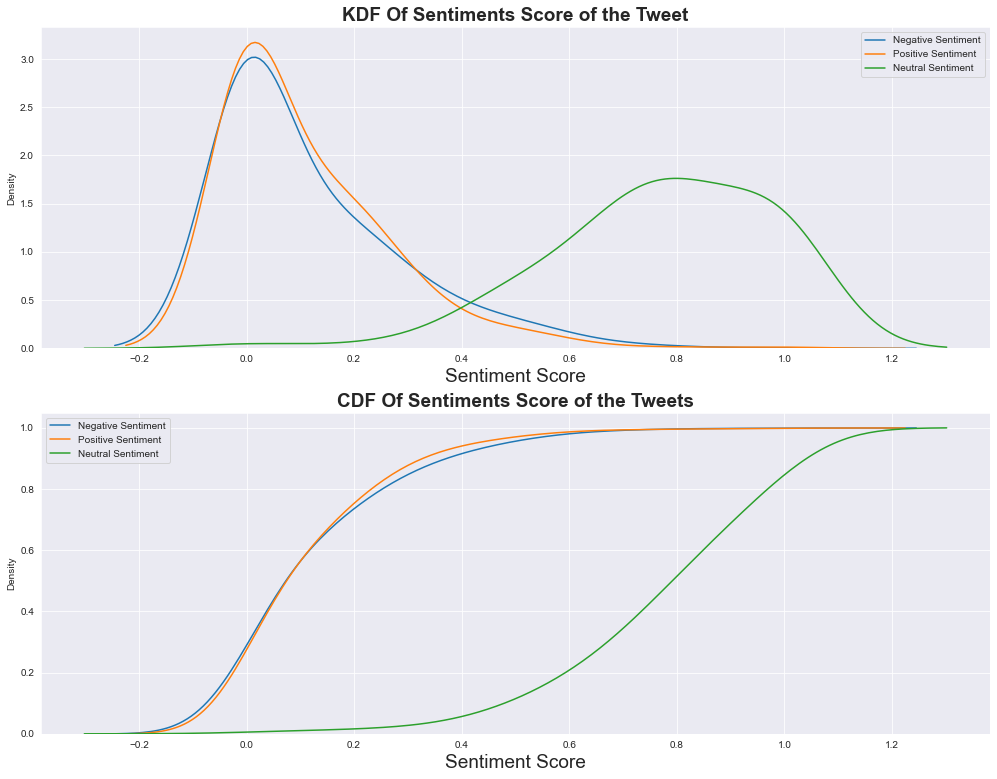

In [195]:
# ploting the kernel Density function of the sentiment Scores 
plt.subplot(2,1,1)
plt.title('KDF Of Sentiments Score of the Tweet',fontsize=19,fontweight='bold')
sns.kdeplot(df2['neg_sent'],bw=0.5)
sns.kdeplot(df2['pos_sent'],bw=0.5)
sns.kdeplot(df2['neu_sent'],bw=0.5)
plt.xlabel('Sentiment Score',fontsize=19)
plt.legend (labels = ['Negative Sentiment','Positive Sentiment','Neutral Sentiment'])
plt.subplot(2,1,2)
plt.title('CDF Of Sentiments Score of the Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(df2['neg_sent'],bw=0.5,cumulative=True)
sns.kdeplot(df2['pos_sent'],bw=0.5,cumulative=True)
sns.kdeplot(df2['neu_sent'],bw=0.5,cumulative=True)
plt.xlabel('Sentiment Score',fontsize=19)
plt.legend (labels = ['Negative Sentiment','Positive Sentiment','Neutral Sentiment'])
plt.show()

### **Note**:
Observerd from the above chart that display the kdf and cdf of the sentiment score, was the similarity between postive and negative score. also it was observe that the distribution has a bell shape, which implies that the distribution follow normal distribution.

It is also clear that the dominant sentiment is positive and negative oddly, most of the tweets are neither positive or negative sentiment rather neutral.

### TASK 2

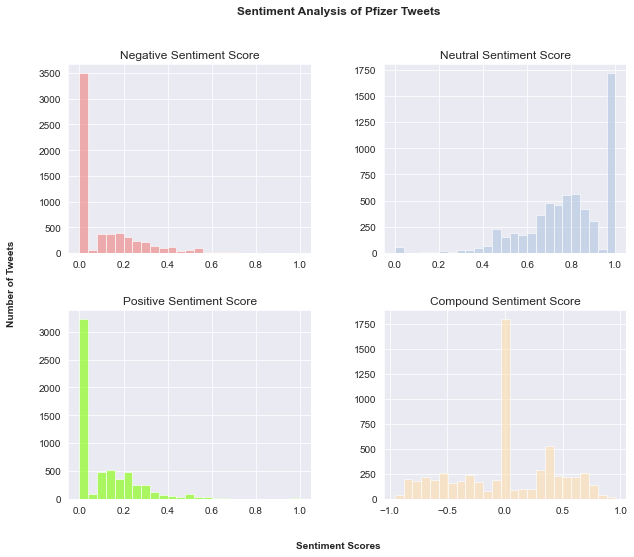

In [117]:
# plot all 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))
bj2.hist('neg_sent', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
bj2.hist('neu_sent', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
bj2.hist('pos_sent', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
bj2.hist('comp_sent', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
axes[1,1].set_title('Compound Sentiment Score')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Tweets', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of Pfizer Tweets\n\n', fontsize=12, fontweight='bold');

## **Report**:
It was observed from the histogram of four vader metric scores in the sentiment analysis score of tweet, that the compound distribution range from (-1 to 1) with much frequency skewed to the right and the center value having much value. also both positve and negative distribution have simple pattern with both ranging from (0 to 1) this align with the kdf chart displaying no significance difference between positive and negative sentiment score.

In [118]:
bj2.columns

Index(['user_name', 'date', 'tweet', 'favorite_count', 'sources', 'followers',
       'ver_acct', 'yr_crt', 'acc_yrold', 'day_date', 'hur_date', 'tot_eng',
       'acc_cat', 'city', 'country', 'cl_twt', 'has', 'neg_sent', 'neu_sent',
       'pos_sent', 'comp_sent', 'sentiment'],
      dtype='object')

## TASK 3

In [379]:
#Re-sample by Mean
dt_mean = df3.resample('D').mean()
#reset the index
dam = dt_mean.reset_index()
#display the last 5 row
dam

,date,favorite_count,followers,ver_acct,yr_crt,acc_yrold,day_date,hur_date,tot_eng,neg_sent,neu_sent,pos_sent,comp_sent
0,2021-12-08,1.670228,2639.524526,0.003885,2014.189412,6.810588,8.0,18.664400,13.027683,0.145911,0.770996,0.077745,-0.115719
1,2021-12-09,0.856678,1910.925896,0.003257,2014.775244,6.224756,9.0,12.315961,36.254886,0.150423,0.741621,0.102252,-0.081488
2,2021-12-10,2.248865,2780.045413,0.003633,2014.448683,6.551317,10.0,12.452316,34.724796,0.115797,0.759876,0.121601,-0.007161
3,2021-12-11,1.431085,2464.585044,0.005865,2014.957478,6.042522,11.0,11.967742,36.244868,0.096947,0.776374,0.120824,0.040266
4,2021-12-12,2.706154,2683.618462,0.004615,2014.216154,6.783846,12.0,13.712308,44.284615,0.093037,0.779016,0.126384,0.060824
5,2021-12-13,1.961957,2028.567029,0.000000,2015.114130,5.885870,13.0,14.836957,28.746377,0.090866,0.779174,0.129957,0.060055
6,2021-12-14,0.912913,1952.102102,0.000000,2015.267267,5.732733,14.0,14.219219,14.789790,0.093766,0.778135,0.122087,0.056038
7,2021-12-15,1.967332,2617.450091,0.001815,2014.395644,6.604356,15.0,15.337568,11.606171,0.091292,0.813474,0.089784,0.035535
8,2021-12-16,1.632258,3325.797849,0.002151,2014.726882,6.273118,16.0,14.713978,26.070968,0.082800,0.811155,0.106037,0.052952
9,2021-12-17,2.212625,3473.539867,0.004983,2014.151163,6.848837,17.0,6.322259,10.770764,0.089683,0.756895,0.153417,0.115886


In [380]:
dam.to_csv('des.csv')

In [196]:
#Create a DataFrame of Date by Average 
df2 = df2.sort_values(by = 'date').reset_index(drop = True)
df3 = df2.copy()
#convert date to index 
df3.index = df3['date']
df3.head()
#Re-sample by Mean
dt_mean = df3.resample('60min').mean()
#reset the index
dt_m = dt_mean.reset_index()
#display the last 5 row
dt_m.tail()

,date,favorite_count,followers,ver_acct,yr_crt,acc_yrold,day_date,hur_date,tot_eng,neg_sent,neu_sent,pos_sent,comp_sent
205,2021-12-17 05:00:00,3.540541,5738.851351,0.000000,2014.648649,6.351351,17.0,5.0,19.054054,0.111068,0.705041,0.183878,0.078026
206,2021-12-17 06:00:00,6.915254,3220.237288,0.016949,2014.169492,6.830508,17.0,6.0,20.338983,0.098847,0.747898,0.153220,0.080868
207,2021-12-17 07:00:00,1.333333,2222.129032,0.000000,2013.827957,7.172043,17.0,7.0,7.182796,0.096817,0.728505,0.174661,0.158068
208,2021-12-17 08:00:00,1.078431,3691.352941,0.006536,2014.575163,6.424837,17.0,8.0,6.941176,0.086425,0.778699,0.134876,0.100214
209,2021-12-17 09:00:00,0.250000,4090.909091,0.000000,2014.272727,6.727273,17.0,9.0,3.909091,0.055591,0.780886,0.163591,0.147620


In [153]:
dt_m.columns

Index(['date', 'favorite_count', 'followers', 'ver_acct', 'yr_crt',
       'acc_yrold', 'day_date', 'hur_date', 'tot_eng', 'neg_sent', 'neu_sent',
       'pos_sent', 'comp_sent'],
      dtype='object')

In [200]:
#chart for the average 
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Average Positive Sentiment',  'Average Negative Sentiment'))

fig.add_trace(
    go.Scatter(x=dt_m['date'], y=dt_m['pos_sent'],name='Positive Sentiment Mean'),
    row=1, col=1
)

    
#positive mean
fig.add_shape(type="line",
    x0=dt_m['date'].values[0], y0=dt_m['pos_sent'].mean(), x1=dt_m['date'].values[-1], y1=dt_m['pos_sent'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2', 
        yref='y2'
)

fig.add_trace(
    go.Scatter(x=dt_m['date'], y=dt_m['neg_sent'],name='Negative Sentiment Mean'),
    row=2, col=1
)

#negative mean
fig.add_shape(type="line",
    x0=dt_m['date'].values[0], y0=dt_m['neg_sent'].mean(), x1=dt_m['date'].values[-1], y1=dt_m['neg_sent'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2', 
        yref='y2'
)


fig['layout']['xaxis2']['title'] = 'Date'
fig.update_layout(height=700, width=900, title_text="Sentiment Average Change With Time")
fig.show()


### TASK 4

In [381]:
#Daily STD
#Re-sample by S.D
dt_std = df3.resample('D').std()
#reset the index
das = dt_std.reset_index()
#display the last 5 row
das

,date,favorite_count,followers,ver_acct,yr_crt,acc_yrold,day_date,hur_date,tot_eng,neg_sent,neu_sent,pos_sent,comp_sent
0,2021-12-08,8.997923,38544.916904,0.062227,4.234853,4.234853,0.0,1.817887,50.987991,0.179553,0.200329,0.125567,0.443816
1,2021-12-09,7.085850,3748.434868,0.057003,4.220296,4.220296,0.0,6.498411,56.873279,0.194186,0.236646,0.155259,0.444411
2,2021-12-10,19.902166,17177.994955,0.060193,4.240749,4.240749,0.0,4.673401,62.907924,0.144628,0.186045,0.143295,0.462956
3,2021-12-11,13.202215,12342.996964,0.076415,4.391917,4.391917,0.0,6.126097,52.031309,0.152372,0.196900,0.140571,0.481111
4,2021-12-12,20.217862,15807.890076,0.067806,4.333149,4.333149,0.0,5.354586,69.185065,0.143722,0.183107,0.148186,0.405126
5,2021-12-13,17.000705,5006.484450,0.000000,4.291935,4.291935,0.0,5.870862,72.702118,0.148755,0.194512,0.171967,0.445431
6,2021-12-14,3.408209,3605.638206,0.000000,4.130847,4.130847,0.0,6.309535,33.546914,0.148665,0.211515,0.175726,0.447286
7,2021-12-15,11.331325,7560.893032,0.042601,4.127898,4.127898,0.0,5.124134,31.183374,0.159653,0.200091,0.131395,0.375388
8,2021-12-16,9.604026,13172.558373,0.046374,4.089071,4.089071,0.0,5.534173,51.991226,0.125555,0.176715,0.152686,0.410458
9,2021-12-17,15.041749,10552.654518,0.070476,4.281144,4.281144,0.0,2.204021,24.088590,0.139422,0.199071,0.185559,0.439423


In [382]:
das.to_csv('des2.csv')

In [201]:
#Per hour STD
#Re-sample by S.D
dt_std = df3.resample('60min').std()
#reset the index
dt_s = dt_std.reset_index()
#display the last 5 row
dt_s.tail()

,date,favorite_count,followers,ver_acct,yr_crt,acc_yrold,day_date,hur_date,tot_eng,neg_sent,neu_sent,pos_sent,comp_sent
205,2021-12-17 05:00:00,14.205140,22148.698822,0.000000,4.272988,4.272988,0.0,0.0,26.918900,0.122332,0.212485,0.235749,0.472631
206,2021-12-17 06:00:00,42.390341,7887.242566,0.130189,4.331730,4.331730,0.0,0.0,46.198078,0.133664,0.182390,0.195088,0.489943
207,2021-12-17 07:00:00,3.503923,3661.724257,0.000000,4.126706,4.126706,0.0,0.0,14.810841,0.146383,0.184210,0.180579,0.479283
208,2021-12-17 08:00:00,3.313706,8567.594155,0.080845,4.428812,4.428812,0.0,0.0,16.479347,0.154515,0.203158,0.165145,0.392306
209,2021-12-17 09:00:00,0.651474,13802.443708,0.000000,4.326036,4.326036,0.0,0.0,12.422444,0.089786,0.215832,0.207036,0.348678


In [202]:
#chart for the STD
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('STD Positive Sentiment',  'STD Negative Sentiment'))

fig.add_trace(
    go.Scatter(x=dt_s['date'], y=dt_s['pos_sent'],name='Positive Sentiment STD'),
    row=1, col=1
)

    
#positive mean
fig.add_shape(type="line",
    x0=dt_s['date'].values[0], y0=dt_s['pos_sent'].mean(), x1=dt_s['date'].values[-1], y1=dt_s['pos_sent'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2', 
        yref='y2'
)

fig.add_trace(
    go.Scatter(x=dt_s['date'], y=dt_s['neg_sent'],name='Negative Sentiment STD'),
    row=2, col=1
)

#negative mean
fig.add_shape(type="line",
    x0=dt_s['date'].values[0], y0=dt_s['neg_sent'].mean(), x1=dt_s['date'].values[-1], y1=dt_s['neg_sent'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2', 
        yref='y2'
)


fig['layout']['xaxis2']['title'] = 'Date'
fig.update_layout(height=700, width=900, title_text="Sentiment Standard_Deviation Change With Time")
fig.show()


In [210]:
df2.columns

Index(['user_name', 'date', 'tweet', 'favorite_count', 'sources', 'followers',
       'ver_acct', 'yr_crt', 'acc_yrold', 'day_date', 'hur_date', 'tot_eng',
       'acc_cat', 'cl_twt', 'has', 'neg_sent', 'neu_sent', 'pos_sent',
       'comp_sent', 'sentiment'],
      dtype='object')

## Task 5

In [211]:
#create the dataFrame
cr1 = df[['followers','ver_acct','user_fav','tot_eng']]
cr2= df2[['neg_sent','neu_sent','pos_sent','comp_sent']]
#join the data
dtc = pd.concat([cr1,cr2],axis = 1)
#display head
dtc.head()

,followers,ver_acct,user_fav,tot_eng,neg_sent,neu_sent,pos_sent,comp_sent
0,276,False,4962,10,0.000,1.000,0.000,0.0000
1,1576,False,33941,3,0.077,0.923,0.000,-0.1882
2,1501,False,42933,0,0.375,0.625,0.000,-0.3400
3,20874,False,169317,2,0.469,0.531,0.000,-0.9226
4,79,False,3751,0,0.365,0.529,0.106,-0.7096


In [212]:
dtc.columns 

Index(['followers', 'ver_acct', 'user_fav', 'tot_eng', 'neg_sent', 'neu_sent',
       'pos_sent', 'comp_sent'],
      dtype='object')

In [214]:
# Correlation Analysis 
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Perason Correaltion',  'Spearman Correaltion'))
colorscale=     [[1.0              , "rgb(165,0,38)"],
                [0.8888888888888888, "rgb(215,48,39)"],
                [0.7777777777777778, "rgb(244,109,67)"],
                [0.6666666666666666, "rgb(253,174,97)"],
                [0.5555555555555556, "rgb(254,224,144)"],
                [0.4444444444444444, "rgb(224,243,248)"],
                [0.3333333333333333, "rgb(171,217,233)"],
                [0.2222222222222222, "rgb(116,173,209)"],
                [0.1111111111111111, "rgb(69,117,180)"],
                [0.0               , "rgb(49,54,149)"]]

dtcp = dtc.corr(method = 'pearson')
dtcp_idx = dtcp.index
dtcp_col = dtcp.columns
dtcp_val = dtcp.values
fig.add_trace(
    go.Heatmap(x=dtcp_col,y=dtcp_idx,z=dtcp_val,name='pearson',showscale=False,xgap=1,ygap=1,colorscale=colorscale),
    row=1, col=1
)


dtcs = dtc.corr(method = 'spearman')
dtcs_idx = dtcs.index
dtcs_col = dtcs.columns
dtcs_val = dtcs.values
fig.add_trace(
    go.Heatmap(x=dtcs_col,y=dtcs_idx,z=dtcs_val,name = 'spearman',xgap=1,ygap=1,colorscale=colorscale),
    row=2, col=1
)

fig.update_layout(height=700, width=900, title_text="Correlation Analysis")
fig.show()

## Data Visualization 

Below are the following task carried out: 

- Sentiment Count 
- Frequency of Common Word  
- Frequency of count in hastag 
- Frequency by location 
- Frequency by Sources 

In [215]:
df2.columns

Index(['user_name', 'date', 'tweet', 'favorite_count', 'sources', 'followers',
       'ver_acct', 'yr_crt', 'acc_yrold', 'day_date', 'hur_date', 'tot_eng',
       'acc_cat', 'cl_twt', 'has', 'neg_sent', 'neu_sent', 'pos_sent',
       'comp_sent', 'sentiment'],
      dtype='object')

## Sentiment Count 

In [219]:
#this section count the sentiment analysis of the tweet 
temp = df2.groupby('sentiment').count ()['cl_twt'].reset_index().sort_values(by='cl_twt',ascending=False)
#temp.columns = ['sentiment','count']
temp.style.background_gradient(cmap='Purples')

,sentiment,cl_twt
2,positive,3246
1,negative,3202
0,Neutral,2425


In [220]:
#plot Funel CHart for the Sentiment analysis 
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.cl_twt,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [223]:
#PIE CHART of Sentiment Distribution 
Neutral =len(df2[df2['sentiment']=='Neutral'])
Negative = len(df2[df2['sentiment']=='negative'])
Positive = len(df2[df2['sentiment']=='positive'])
labels = ['Negative','Positive','Neutral']
values = [Negative,Positive,Neutral]
#====
import plotly.graph_objects as go
colors = ['darkred','green', 'darkblue' ]

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,textposition='inside',
                  marker=dict(colors=colors, line=dict(color='grey', width=1)))
fig.show()

## Frequency Distribution of Common Word in th Tweet 

- 

In [224]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [252]:
df2['cl_twt']

0                                simple and to the point 
1       allegra stratton resigning thats the least she...
2                     think carrie johnson should resign 
3       boo hoo hoo im losing my kyear salary for doin...
4        boris johnson blaming his staff for the poiso...
5       no let the stay and suffer we all know heslazy...
6       the reality is that the politicians especially...
7       allegra stratton has quit inse alan paridge sh...
8       my nan was beautiful lady who seen the good in...
9       all while the only people we had to trust to r...
10       if we cant trustprime minister to tell the tr...
11       you need to resign you are am embarrassment f...
12       right good people bit more rest mug of coffee...
13              politics is viciousfeelbit sorry for her 
14       if we cant trustprime minister to tell the tr...
15      i dont know whats worse at xmas being in lockd...
16       new coronavirus cases today more people have ...
17      this g

In [308]:
#Stopswords was remove in this cell using english dictionary from 'Snowballstemmer library'
from nltk.stem import SnowballStemmer
sno = SnowballStemmer('english') #set Snowballstemming to be english
remove_wrd = ['c','ny','isf','dj','ive','ha','ki','gtf','cli','f','da','im']# some common single words that were not proper addressed in the text preprocessing 
stop_words = (set(stopwords.words('english')))
stop_words = remove_wrd + list(stop_words) # create stopwords 

In [309]:
#stopword function 
def remove_stopword(x):
    return [y for y in x if y not in stop_words] #list comprehension for removing stop words 
df2['cl_twt2'] = df2['cl_twt'].apply(lambda x:str(x).split()) # we create a columns where the tweets where split, for easy removing of stopword
df2['cl_twt2'] = df2['cl_twt2'].apply(lambda x:remove_stopword(x))# apply the remove stop word function on the new created columns 
df2['cl_twt2'] = df2['cl_twt2'].apply(lambda x: lemme(x))

**Note**: 
From the result of the common word 

In [298]:
#lemmatizer 
from nltk.stem import WordNetLemmatizer 
lemma = WordNetLemmatizer ()
def lemme (x):
    return [lemma.lemmatize(y,pos = 'v') for y in x]

## Common Words in Tweet

In [377]:
#MosT common Words in The Tweet
top_w = Counter([item for sublist in df2['cl_twt2'] for item in sublist])
temp_w = pd.DataFrame(top_w.most_common(30))
temp_w.columns = ['Common_words','count']
temp_w.style.background_gradient(cmap='Blues')

,Common_words,count
0,boris,1457
1,johnson,1326
2,get,970
3,need,815
4,go,680
5,pay,668
6,people,592
7,government,489
8,lie,474
9,say,457


In [315]:
# Barchat of most frequent words in the tweet
fig = px.bar(temp_w, x="count", y="Common_words", title='Most Frequently Words in Tweet - Top 30', orientation='h', 
             width=700, height=700,color='Common_words', template = 'ggplot2')
fig.show()

## Common Words Sentiment Wise 

In [311]:
#CREATING DATA FRAME FOR POSITIVE, NEGATIVE, AND NEUTRAL sentiment 
positive_sent = df2[df2['sentiment']=='positive']
negative_sent = df2[df2['sentiment']=='negative']
neutral_sent = df2[df2['sentiment']=='Neutral']

In [371]:
from collections import Counter #this library was used for counting the common words
#MosT common positive words
top1 = Counter([item for sublist in positive_sent['cl_twt2'] for item in sublist])
temp_positive = pd.DataFrame(top1.most_common(30))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,johnson,667
1,need,596
2,boris,582
3,pay,495
4,get,414
5,go,363
6,quiz,302
7,christmas,247
8,take,244
9,people,226


In [313]:
# Barchat of most frequent words in positive tweet
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Frequently Positive Words in Tweet - Top 30', orientation='h', 
             width=700, height=700,color='Common_words', template = 'ggplot2')
fig.show()

In [372]:
#MosT common Negative words
top2 = Counter([item for sublist in negative_sent['cl_twt2'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(30))
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
0,boris,483
1,johnson,434
2,lie,393
3,get,366
4,government,339
5,resign,300
6,people,280
7,many,220
8,tories,192
9,amp,186


In [316]:
# Barchat of most frequent words in negative tweet
fig = px.bar(temp_negative, x="count", y="Common_words", title='Most Frequently Negative Words in Tweet - Top 30', orientation='h', 
             width=700, height=700,color='Common_words', template = 'ggplot2')
fig.show()

## WordCloud Display 

- WordCloud for Common Word in the Tweet
- WordCloud for Common Word in Positive Tweet 
- WordCloud for Common Word in Negative Tweet 

In [319]:
from PIL import Image

Text(0.5, 1.0, 'WordCloud of Most Tweets')

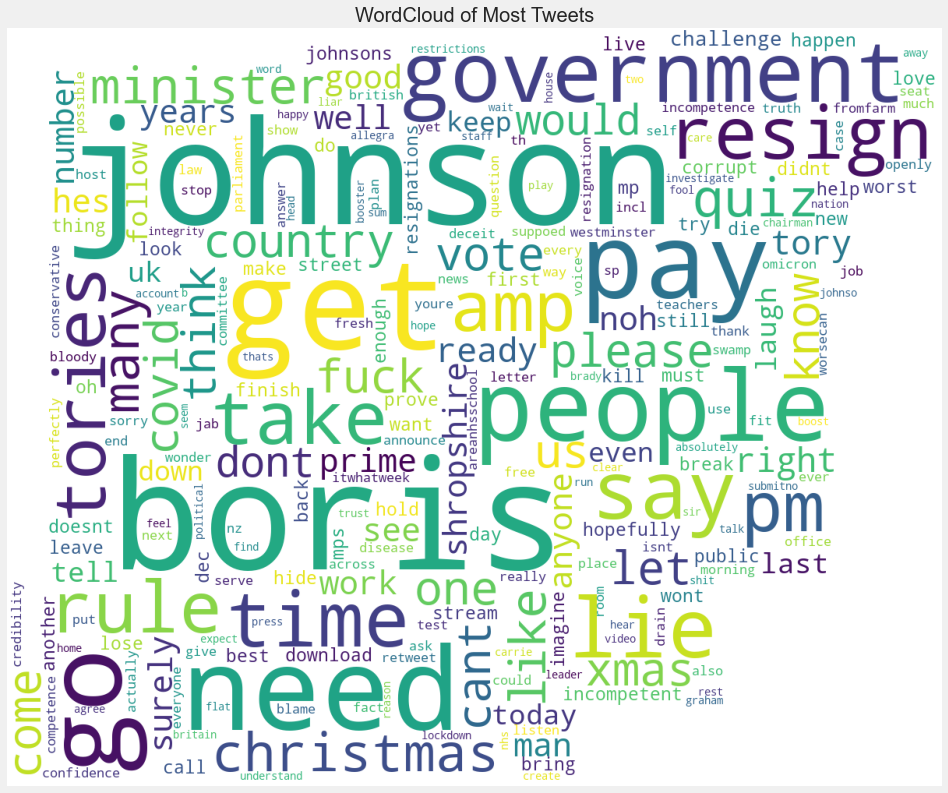

In [378]:
#WordCloud of word Tweet
wrd_cloud = WordCloud(background_color = 'white',mask= pos_mask, max_words=250).generate_from_frequencies(dict(top_w))

#plt.style.use('fivethirtyeight')
#plt.figure(figsize=(16, 16))
plt.axis('off')
plt.imshow(wrd_cloud)
plt.title('WordCloud of Most Tweets', fontsize = 20)

Text(0.5, 1.0, 'WordCloud of Positive Tweets')

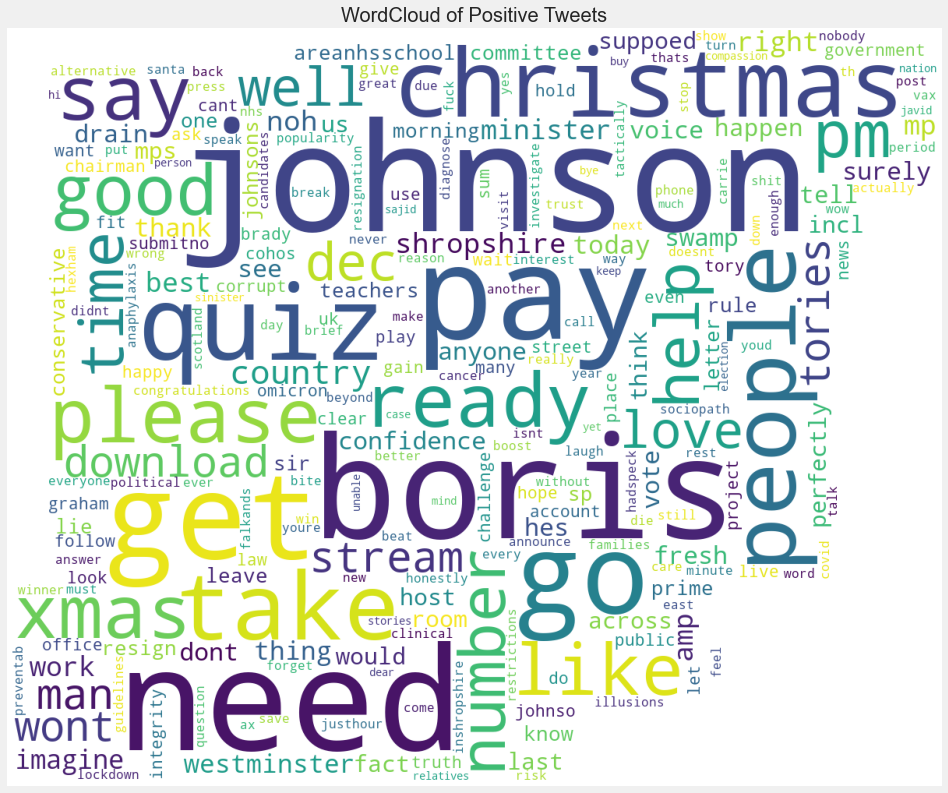

In [375]:
#WordCloud of Positive Tweet
wrd_cloud = WordCloud(background_color = 'white',mask= pos_mask, max_words=250).generate_from_frequencies(dict(top1))

#plt.style.use('fivethirtyeight')
#plt.figure(figsize=(16, 16))
plt.axis('off')
plt.imshow(wrd_cloud)
plt.title('WordCloud of Positive Tweets', fontsize = 20)

Text(0.5, 1.0, 'WordCloud of Negative Tweets')

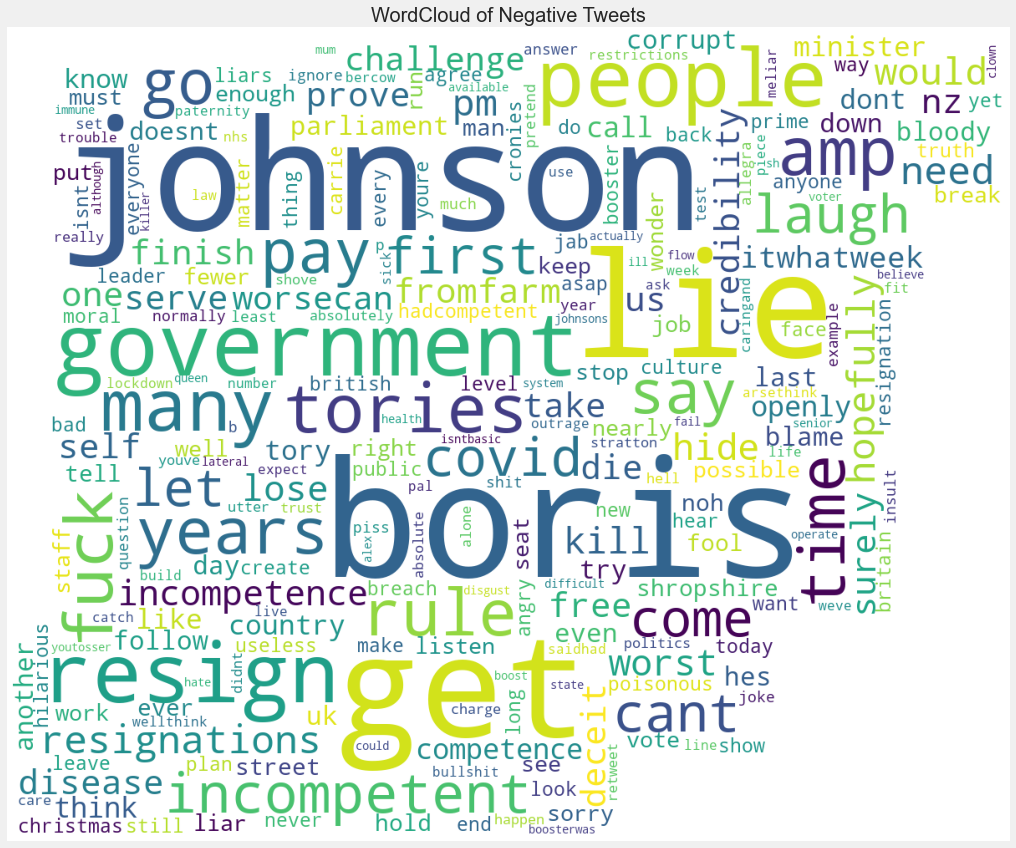

In [376]:
#WordCloud of Negative Tweet
wrd_cloud = WordCloud(background_color = 'white',mask= pos_mask, max_words=250).generate_from_frequencies(dict(top2))

#plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 16))
plt.axis('off')
plt.imshow(wrd_cloud)
plt.title('WordCloud of Negative Tweets', fontsize = 20)

In [328]:
df2.columns

Index(['user_name', 'date', 'tweet', 'favorite_count', 'sources', 'followers',
       'ver_acct', 'yr_crt', 'acc_yrold', 'day_date', 'hur_date', 'tot_eng',
       'acc_cat', 'cl_twt', 'has', 'neg_sent', 'neu_sent', 'pos_sent',
       'comp_sent', 'sentiment', 'cl_twt2'],
      dtype='object')

## Sources of Tweet By Sentiment 

In [333]:
#Create Data Frame for Sources by Sentiment 
sur = df2.groupby(['sources','sentiment']).count()['cl_twt']
#pass it into data frame 
sur = pd.DataFrame(sur).sort_values (by = 'cl_twt', ascending=False).reset_index()
#pass a new column 
sur.columns = ['sources','sentiment','count']
#first 5 row 
sur.head()

,sources,sentiment,count
0,Twitter for Android,positive,1249
1,Twitter for Android,negative,1218
2,Twitter for iPhone,negative,1081
3,Twitter for iPhone,positive,1076
4,Twitter for Android,Neutral,895


In [336]:
# Bar Chart Most used Sources for Positive Tweet 
fig = px.bar(sur[sur["sentiment"] == 'positive'], x ="count",y="sources",color="sources",
             text="count",title="Most Used Source for Positive Tweets", template = 'plotly_white')
fig.update_traces(textposition='outside')
fig.show()

**Note**: 

Since most of the sources count are above 7, then we extract the sources with count greater 7 

In [335]:
# sources above 7 count
sur = sur[sur['count']>7]

In [337]:
# Bar Chart Most used Sources for Negative Tweet 
fig = px.bar(sur[sur["sentiment"] == 'negative'], x ="count",y="sources",color="sources",
             text="count",title="Most Used Source for Negative Tweets", template = 'plotly_white')
fig.update_traces(textposition='outside')
fig.show()

## Loation With Most Tweet By Sentiment 

In [349]:
#create pos, neg, and neut from another data set 
pos_twt = bj3[bj3['sentiment'] == 'positive']
neg_twt = bj3[bj3['sentiment'] == 'negative']
neut_twt = bj3[bj3['sentiment'] == 'Neutral']

In [348]:
#observed from the column after the first display of the grahp, was country inplace of city 
#Hence, rough cleaning of the city columns 
city_fix = {'london':'London','UK':'Manchester','England':'Liverpool','London UK':'London',
            'Yorkshire and The Humber': 'Yorkshire','West Yorkshire':'Yorkshire','Newcastle Upon Tyne':'Newcastle',
           'england':'Birmingham','Manchester UK': 'Manchester','North West':'Lancashire',
           'South East':'Oxfordshire','West Midlands':'Birmingham','South West': 'Bristol','North East':'Newcastle',
           'East Midlands':'Nottingham','Scotland': 'Glasgow','United Kingdom':'London'}
bj3 = bj2.replace({'city':city_fix})

In [351]:
# Most Cities with Positive Tweet
top_loc = pos_twt.groupby('city').count()['tweet'].sort_values(ascending = False)
loc_pos = pd.DataFrame(top_loc[:20]).reset_index()
loc_pos.columns = ['city','count']
loc_pos.style.background_gradient(cmap='Reds')

,city,count
0,London,299
1,Liverpool,128
2,Manchester,111
3,Glasgow,51
4,Bristol,30
5,Lancashire,29
6,Birmingham,28
7,Oxfordshire,22
8,Edinburgh,20
9,Yorkshire,20


In [354]:
#Tree Representation of the Most Cities with Positive Tweet
fig = px.treemap(loc_pos, path=['city'], values='count',
                 title='Treemap Of Most States/Cities With Positive Tweet', template = 'ggplot2')
fig.show()

In [355]:
# Most Cities with Negative Tweet
top_loc = neg_twt.groupby('city').count()['tweet'].sort_values(ascending = False)
loc_neg = pd.DataFrame(top_loc[:20]).reset_index()
loc_neg.columns = ['city','count']
loc_neg.style.background_gradient(cmap='Greens')

,city,count
0,London,270
1,Liverpool,130
2,Manchester,99
3,Glasgow,85
4,Lancashire,42
5,Bristol,42
6,global,35
7,Birmingham,31
8,Newcastle,23
9,Oxfordshire,19


In [356]:
#Tree Representation of the Most Cities with Negative Tweet
fig = px.treemap(loc_neg, path=['city'], values='count',title='Treemap Of Most States/Cities With Negative Tweet')
fig.show()

## Sentiment Count by Account Category 

<AxesSubplot:xlabel='acc_cat', ylabel='count'>

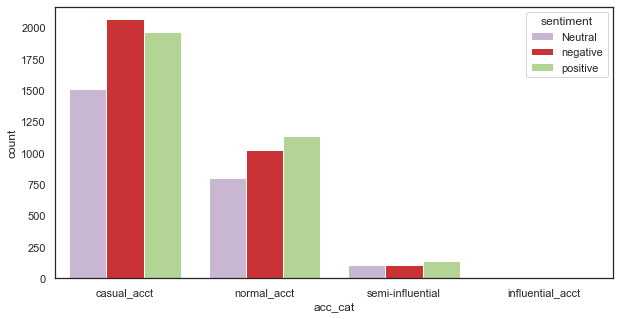

In [370]:
#chart of sentiment by Account category
plt.figure(figsize=(10,5))
sns.set(style="white")
sns.countplot(x=df2['acc_cat'],data=df2,hue=df2['sentiment'],palette="Paired_r")

## Total Engagement BY Sentiment 

In [360]:
df2.columns

Index(['user_name', 'date', 'tweet', 'favorite_count', 'sources', 'followers',
       'ver_acct', 'yr_crt', 'acc_yrold', 'day_date', 'hur_date', 'tot_eng',
       'acc_cat', 'cl_twt', 'has', 'neg_sent', 'neu_sent', 'pos_sent',
       'comp_sent', 'sentiment', 'cl_twt2'],
      dtype='object')

In [369]:
#data n chart 
eng_s=df2.groupby('sentiment',as_index=False).agg({'tot_eng':'mean'}).sort_values(by = 'tot_eng',ascending=True)
#chart
fig = px.bar(eng_s, x='tot_eng', y='sentiment',
             hover_data=['tot_eng'], color='tot_eng',
             title= 'Average Engagement By Sentiment', template = 'seaborn')
fig.show()

## Thanks 